In [1]:
import spacy
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from Agents import AgentML

/home/rohit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
nlp = spacy.load('en')

In [3]:
query = "I want to buy a pair of shoes"

In [4]:
input_data = []
for token in nlp(query):
        input_data.append(token.text)

In [5]:
input_data

['I', 'want', 'to', 'buy', 'a', 'pair', 'of', 'shoes']

In [6]:
pickle_in = open("dict.pickle","rb")
word_to_hot = pickle.load(pickle_in)

In [7]:
one_hot = copy.deepcopy(input_data)

In [8]:
for i, word in enumerate(input_data):
    if word in word_to_hot.keys():
        one_hot[i] = word_to_hot[word]
    else:
        one_hot[i] = np.zeros(1591, )

In [9]:
my_model = load_model('my_model.h5')

In [10]:
envML = AgentML()

In [11]:
ml_intent_list = []

for current_state in one_hot:
    current_state = current_state.reshape(1, 1591)
    ml_dist = envML.act(current_state, my_model)
    ml_intent_list.append(ml_dist)

In [12]:
intent_distribution = np.sum(np.array(ml_intent_list), axis=0)

In [13]:
intents = ['cancellation', 'delay', 'order_modification', 'status', 'product_browse', 
           'reviews', 'address_modification', 'plans_browse', 'store_browse', 'timing']

In [14]:
predicted_intent = np.argmax(intent_distribution)
predicted_intent

4

In [15]:
word_contribution = []
for i in range(len(input_data)):
    word_contribution.append(ml_intent_list[i][0][predicted_intent])

In [16]:
word_contribution

[0.23075978,
 0.31306762,
 0.103852905,
 0.84698313,
 0.18382359,
 0.45689523,
 0.0013344922,
 0.5101569]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

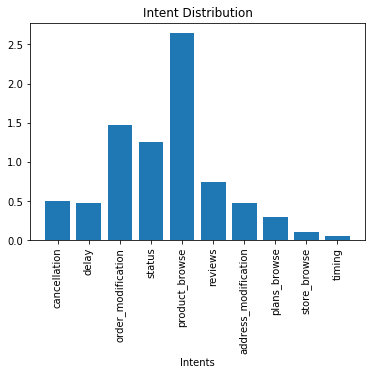

In [17]:
plt.bar(intents, intent_distribution[0])
plt.title('Intent Distribution')
plt.xlabel('Intents')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

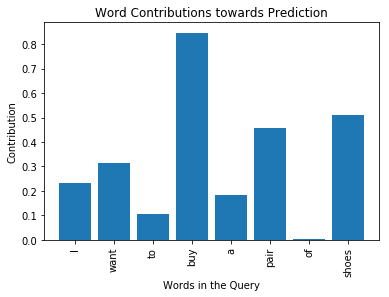

In [18]:
plt.bar(input_data, word_contribution)
plt.title('Word Contributions towards Prediction')
plt.xlabel('Words in the Query')
plt.ylabel('Contribution')
plt.xticks(rotation='vertical')